In [1]:
import mysql.connector
import sqlite3 as sql
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
data = pd.read_csv(r"C:\Users\User\Downloads\casestudy.csv")
data.head()

,Index,Customer_email,net_revenue,year
0,685926,aregboumbw@gmail.com,208.43,2017
1,685925,wvkpmwsgck@gmail.com,235.35,2017
2,685924,appaplmgko@gmail.com,200.98,2017
3,685923,pjodiifjop@gmail.com,133.03,2017
4,685922,qzqttwiftu@gmail.com,184.58,2017


In [3]:
data.isnull()

,Index,Customer_email,net_revenue,year
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
685922,False,False,False,False
685923,False,False,False,False
685924,False,False,False,False
685925,False,False,False,False


In [4]:
import mysql.connector as msql
from mysql.connector import Error
try:
    conn = msql.connect(host='localhost', user='root', password='kaamya')
    if conn.is_connected():
        cursor = conn.cursor()
        cursor.execute("CREATE DATABASE scout_DB")
        print("scout_DB database is created")
except Error as e:
    print("Error while connecting to MySQL", e)

Error while connecting to MySQL 1007 (HY000): Can't create database 'scout_db'; database exists


In [5]:
try:
    conn = msql.connect(host='localhost', database='scout_DB', user='root',password='kaamya')
    if conn.is_connected():
        cursor = conn.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)
        #cursor.execute('DROP TABLE IF EXISTS iris;')
        print('Creating table....')
        cursor.execute("CREATE TABLE customer_data_105 (indexes INT PRIMARY KEY, customer_email char(50) , net_revenue FLOAT, years int)")
        print("customer table is created....")
        #for i,row in data.iterrows():
         #   sql = "INSERT INTO scout_DB.customer_data_105 VALUES (%s,%s,%s,%s)"
          #  cursor.execute(sql, tuple(row))
           # print("Record inserted")
            # the connection is not autocommitted by default, so we must commit to save our changes
            #conn.commit()
except Error as e:
    print("Error while connecting to MySQL", e)

You're connected to database:  ('scout_db',)
Creating table....
Error while connecting to MySQL 1050 (42S01): Table 'customer_data_105' already exists


Note:
    
Heads Up for the Recruiters:
    
Database creation, table creation and adding the csv file content into the table was all done through Jupyter notebook using 
Python. While entering the records into the table i had given a record inserted print statement for every record. 
This cased me issues while trying to add the notebook into my Github repo or rendering as a HTML. To correct this I 
had to re-execute the cells which threw the above two errors. Otherwise the code worked fine when i executed initially. 


In [4]:
cursor = conn.cursor(buffered=True)

In [5]:
sql = "USE scout_DB "
cursor.execute(sql)

# Total revenue for the current year

In [71]:
sql2 = "SELECT Years, round(sum(net_revenue),2) FROM customer_data_105 group by years"
cursor.execute(sql2)
totalrevenue_data = cursor.fetchall()

In [72]:
print(totalrevenue_data)

[(2015, 29036749.19), (2016, 25730943.59), (2017, 31417495.03)]


# New customer revenue

In [9]:
sql3 = "(SELECT years, round(sum(net_revenue),3) from customer_data_105 where years=2016 and customer_email not in (select customer_email FROM customer_data_105 where years=2015)) union (SELECT years, round(sum(net_revenue),3) from customer_data_105 where years=2017 and customer_email not in (select customer_email FROM customer_data_105 where years=2016)) "
cursor.execute(sql3)
newrevenue_data = cursor.fetchall()

print(newrevenue_data)

[(2016, 17206366.901), (2017, 28190557.178)]


# Existing Customer Growth

In [35]:
sql4_1 = "(SELECT round(sum(net_revenue),2) from customer_data_105 where years=2016 and customer_email in (select customer_email from customer_data_105 where years=2015 ))" 
cursor.execute(sql4_1)
cust_revenue_data1 = cursor.fetchall()

[(8524576.69,)]


In [31]:
sql4_1_1 = "(SELECT round(sum(net_revenue),2) from customer_data_105 where years=2015 and customer_email in (select customer_email from customer_data_105 where years=2016))" 
cursor.execute(sql4_1_1)
cust_revenue_data2 = cursor.fetchall()

In [39]:
print("Existing Customer growth for the year 2015-2016: ",round((cust_revenue_data1[0][0]- cust_revenue_data2[0][0]),2))

Existing Customer growth for the year 2015-2016:  39043.65


In [40]:
sql4_2 = "(SELECT round(sum(net_revenue),2) from customer_data_105 where years=2017 and customer_email in (select customer_email from customer_data_105 where years=2016 ))"
cursor.execute(sql4_2)
cust_revenue_data3 = cursor.fetchall()

In [41]:
sql4_2_1 = "(SELECT round(sum(net_revenue),2) from customer_data_105 where years=2016 and customer_email in (select customer_email from customer_data_105 where years=2017 ))"
cursor.execute(sql4_2_1)
cust_revenue_data4 = cursor.fetchall()

In [42]:
print("Existing Customer growth for the year 2016-2017: ",round((cust_revenue_data3[0][0]- cust_revenue_data4[0][0]),2))

Existing Customer growth for the year 2016-2017:  25729.89


# Revenue loss due to attrition

In [12]:
sql5 = "((SELECT years, round(sum(net_revenue),2) from customer_data_105 where years=2015 and customer_email not in (select customer_email from customer_data_105 where years=2016 )) union (SELECT years, round(sum(net_revenue),2) from customer_data_105 where years=2016 and customer_email not in (select customer_email from customer_data_105 where years=2017 ))) "
cursor.execute(sql5)
lostcust_revenue_data = cursor.fetchall()

print(lostcust_revenue_data)

[(2015, 20551216.15), (2016, 22529735.63)]


# Existing Customer Revenue Current Year 

In [14]:
sql6 = "((SELECT years, round(sum(net_revenue),2) from customer_data_105 where years=2016 and customer_email in (select customer_email from customer_data_105 where years=2015 )) union (SELECT years, round(sum(net_revenue),2) from customer_data_105 where years=2017 and customer_email in (select customer_email from customer_data_105 where years=2016 ))) "
cursor.execute(sql6)
existcust_revenue_data = cursor.fetchall()

print(existcust_revenue_data)

[(2016, 8524576.69), (2017, 3226937.85)]


# Existing Customer Revenue Previous Year

In [22]:
sql_2015 = "(SELECT round(sum(net_revenue),2) from customer_data_105 where years=2015 and customer_email in (select customer_email from customer_data_105 where years=2016 ))" 
cursor.execute(sql_2015)
revenue_data = cursor.fetchall()

print("2016:",revenue_data)

2016: [(8485533.04,)]


In [23]:
sql_2017="(SELECT round(sum(net_revenue),2) from customer_data_105 where years=2016 and customer_email in (select customer_email from customer_data_105 where years=2017))"
cursor.execute(sql_2017)
revenue_data = cursor.fetchall()

print("2017:",revenue_data)

2017: [(3201207.96,)]


# Total customers Current Year(each year)

In [24]:
sql7 = "SELECT years, count(distinct(customer_email)) FROM customer_data_105 group by years"
cursor.execute(sql7)
cust_count_data = cursor.fetchall()

print(cust_count_data)

[(2015, 231294), (2016, 204646), (2017, 249987)]


# New customers for each year

In [25]:
sql8 = "(SELECT years, count(distinct(customer_email)) from customer_data_105 where years=2016 and customer_email not in (select distinct(customer_email) from customer_data_105 where years=2015)) union (SELECT years, count(distinct(customer_email)) from customer_data_105 where years=2017 and customer_email not in (select distinct(customer_email) from customer_data_105 where years=2016)) "
cursor.execute(sql8)
newcust_count_data = cursor.fetchall()

print(newcust_count_data)

[(2016, 136891), (2017, 224420)]


# Lost customers count

In [27]:
sql8 = "(SELECT count(distinct(customer_email)) from customer_data_105 where years=2015 and customer_email not in (select distinct(customer_email) from customer_data_105 where years=2016))" 
cursor.execute(sql8)
lostcust_count_data = cursor.fetchall()

print("Customers Lost from year 2015-2016: " ,lostcust_count_data)

Customers Lost from year 2015-2016:  [(163539,)]


In [30]:
sql8_1 = "(SELECT count(distinct(customer_email)) from customer_data_105 where years=2016 and customer_email not in (select distinct(customer_email) from customer_data_105 where years=2017))"
cursor.execute(sql8_1)
lostcust_count_data = cursor.fetchall()

print("Customers Lost from year 2016-2017: " ,lostcust_count_data)

Customers Lost from year 2016-2017:  [(179079,)]


# Data Visualizations

Text(0.5, 1.0, 'Visualizing New Customer Growth from 2015-2017')

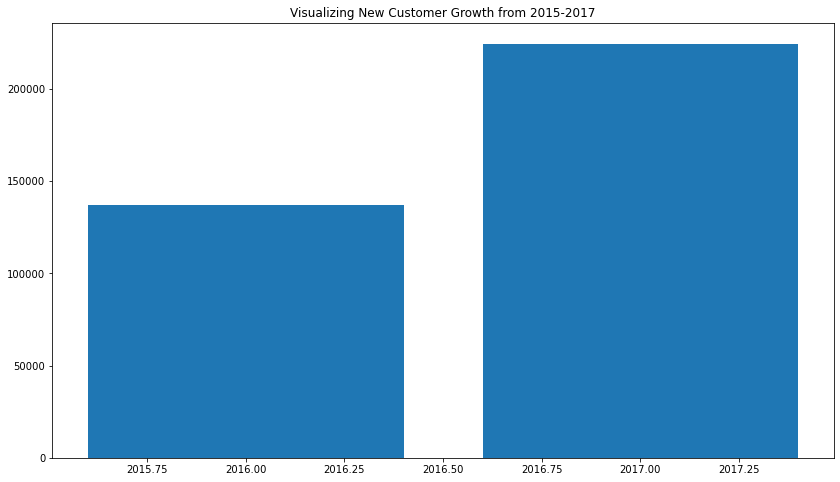

In [66]:
year=[]
new_cust=[]
for i in newcust_count_data:
    year.append(i[0])
    new_cust.append(i[1])

plt.figure(figsize=(14,8))
plt.bar(year, new_cust)
plt.title("Visualizing New Customer Growth from 2015-2017")

This was created to visualize the customer growth and it is evident that there has been a steady customer growth over the years

(2015, 29036749.19)
(2016, 25730943.59)
(2017, 31417495.03)


Text(0.5, 1.0, 'Total Revenue for each year')

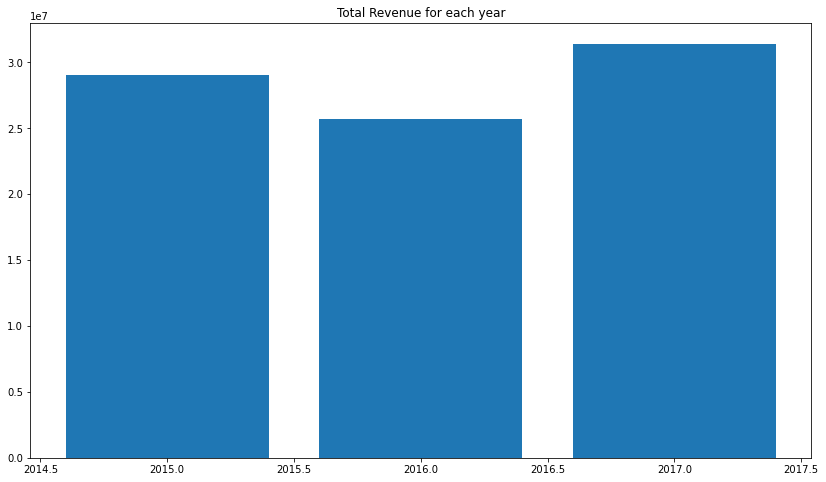

In [73]:
year=[]
new_cust=[]
for i in totalrevenue_data:
    print(i)
    year.append(i[0])
    new_cust.append(i[1])

plt.figure(figsize=(14,8))
plt.bar(year, new_cust)
plt.title("Total Revenue for each year")

This visualization was developed to understand the revene value of the company. Overall the revenue has seen a upward trend 
during 2015-2017 except for a small dip in 2016